[*********************100%%**********************]  1 of 1 completed


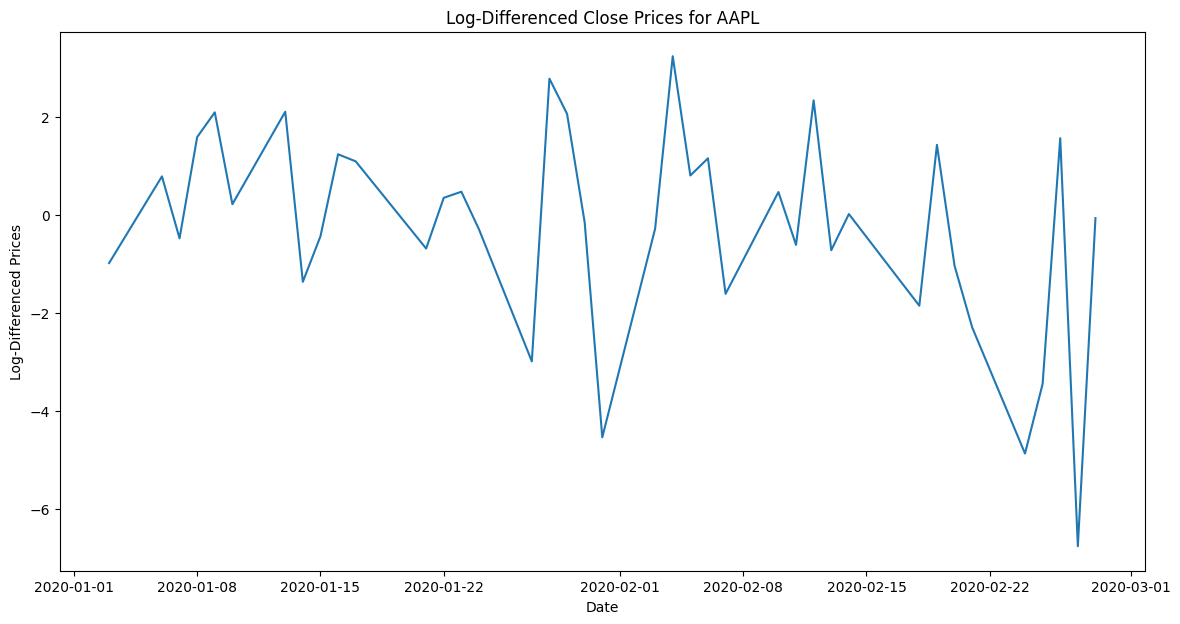

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ExpectationMaximization
# Download stock data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2020-03-01')['Close']

# Transform the data: log and first difference
log_data = np.log(data)
diff_log_data = log_data.diff().dropna()*100

# Plot the transformed data
plt.figure(figsize=(14, 7))
plt.plot(diff_log_data)
plt.title(f'Log-Differenced Close Prices for {ticker}')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Prices')
plt.show()

# Convert to numpy array for use with the SVModel
transformed_data = diff_log_data.to_numpy()
transformed_data.size
data = transformed_data

In [2]:
# Force reload of the SVModel module to ensure it updates with my changes
import importlib
import ExpectationMaximization
importlib.reload(ExpectationMaximization)

# Now, import the SVModel class again
from ExpectationMaximization import SVModel



# Run the model with the transformed data
model = SVModel(transformed_data, n_states=2, tolerance=1e-6, max_iterations=100)
model.fit()  # or model.fit() if you prefer not to use the progress bar



4.503579289653058
[5, 15]
[[0.95 0.05]
 [0.05 0.95]]
[ 5.   15.    0.95  0.05  0.05  0.95]


Fitting Model:   0%|          | 0/100 [00:00<?, ?it/s]

           Parameter                     Value  Std Dev
0           Sigma(s)                [0.0, 0.0]      NaN
1  Transition Matrix  [[0.0, 0.0], [0.0, 0.0]]      NaN


/home/august/code/jupyter/Thesis/ExpectationMaximization.py:209: RuntimeWarning: invalid value encountered in divide
  xi[t, :, :] /= np.sum(xi[t, :, :])


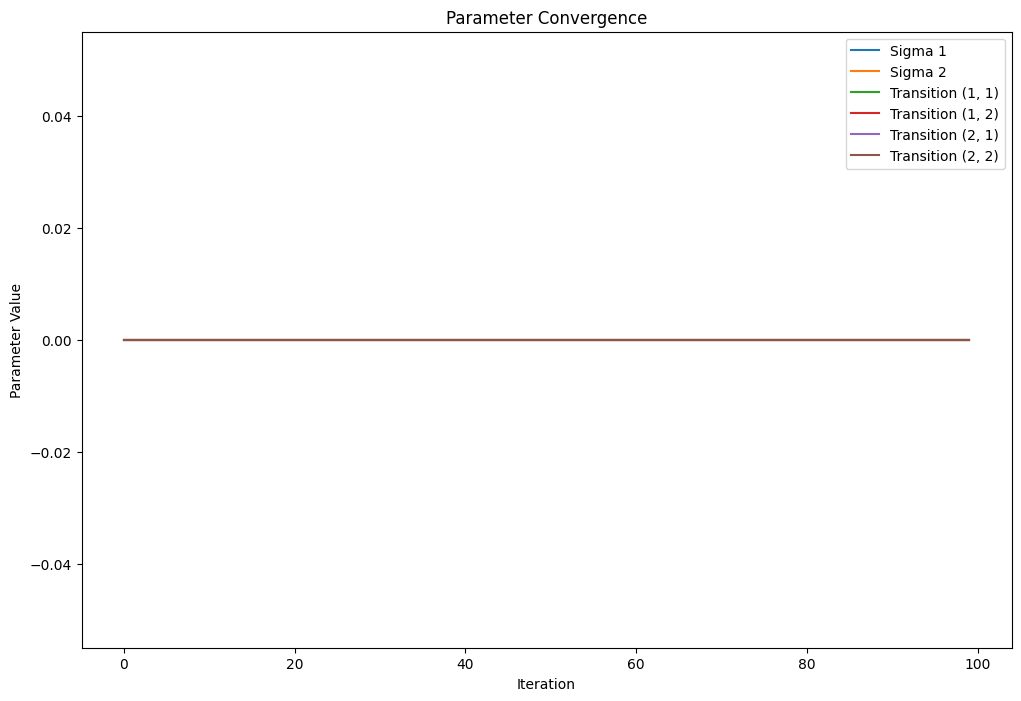

In [47]:
model.plot_parameters()

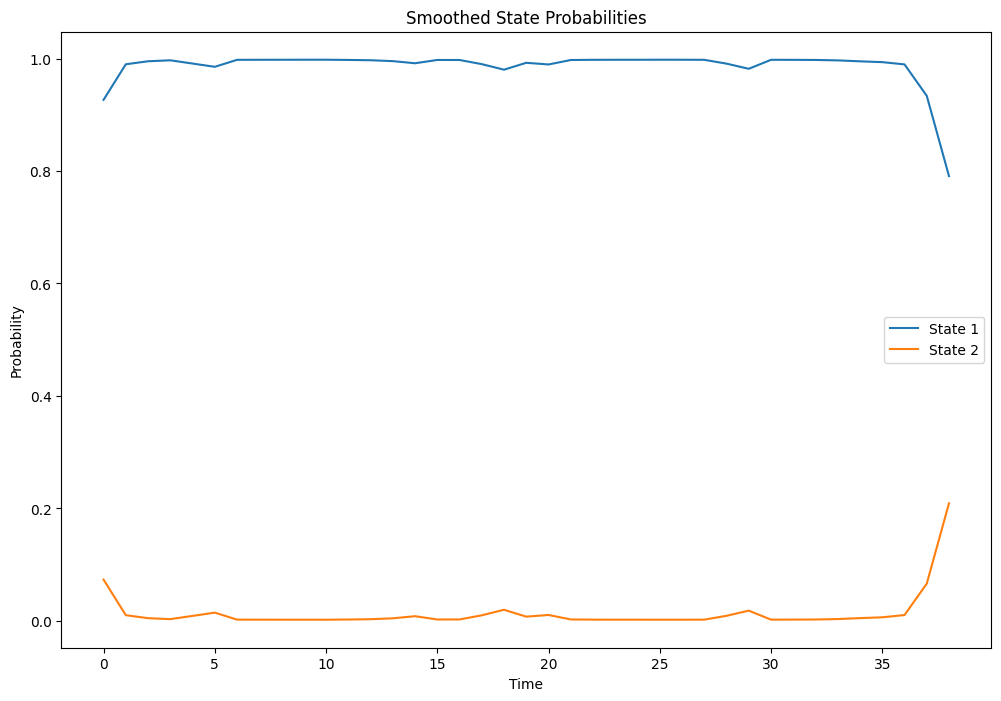

In [3]:

model.plot_smoothed()